# 95-865: Prediction and Model Validation

Author: George H. Chen (georgechen [at symbol] cmu.edu)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# the lines below are just for aesthetics
plt.style.use('ggplot')  # if you want your plot to look at ggplot (like how R makes plots)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

## Data preparation

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
print(test_images.shape)

(10000, 28, 28)


In [5]:
train_images[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
train_images = train_images[:2000]
train_labels = train_labels[:2000]
test_images = test_images[:500]
test_labels = test_labels[:500]

In [7]:
flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image

In [8]:
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

In [9]:
print(flattened_train_images.shape)

(2000, 784)


In [10]:
print(flattened_test_images.shape)

(500, 784)


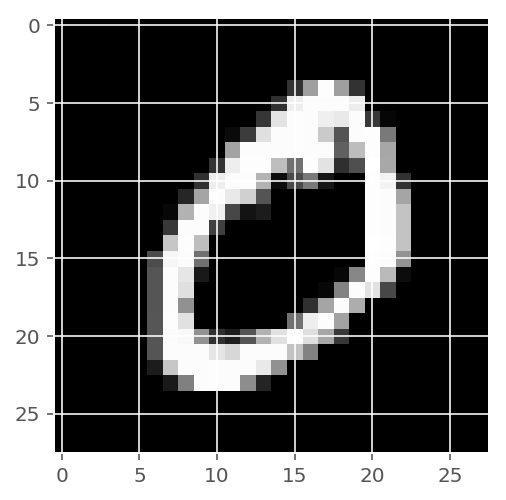

In [11]:
# we could plot out what training images look like
plt.imshow(train_images[1].reshape(28, 28), cmap='gray')

## Classification using $k$-nearest neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(flattened_train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
predicted_train_labels = classifier.predict(flattened_train_images)

In [14]:
predicted_train_labels

array([5, 0, 4, ..., 5, 2, 0], dtype=uint8)

In [15]:
error_rate = np.mean(predicted_train_labels != train_labels)
print(error_rate)

0.0


## Choosing hyperparameter $k$ using simple data splitting

In [16]:
np.random.seed(0)
num_train_images = len(flattened_train_images)
shuffled_indices = np.random.permutation(num_train_images)

train_frac = 0.7
smaller_train_indices = shuffled_indices[:int(train_frac*num_train_images)]
validation_indices = shuffled_indices[int(train_frac*num_train_images):]

In [17]:
lowest_error = np.inf
best_k = None
for k in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(flattened_train_images[smaller_train_indices],
                   train_labels[smaller_train_indices])
    predicted_val_labels = classifier.predict(flattened_train_images[validation_indices])
    error = np.mean(predicted_val_labels != train_labels[validation_indices])
    print('k:', k, 'error rate:', error)
    
    if error < lowest_error:
        lowest_error = error
        best_k = k

print('Best k:', best_k, 'error rate:', lowest_error)

k: 1 error rate: 0.08666666666666667
k: 2 error rate: 0.105
k: 3 error rate: 0.085
k: 4 error rate: 0.095
k: 5 error rate: 0.08666666666666667
k: 6 error rate: 0.09666666666666666
k: 7 error rate: 0.095
k: 8 error rate: 0.09833333333333333
k: 9 error rate: 0.1
k: 10 error rate: 0.105
k: 11 error rate: 0.10666666666666667
k: 12 error rate: 0.10333333333333333
k: 13 error rate: 0.115
k: 14 error rate: 0.11166666666666666
k: 15 error rate: 0.10833333333333334
k: 16 error rate: 0.11
k: 17 error rate: 0.10833333333333334
k: 18 error rate: 0.115
k: 19 error rate: 0.11333333333333333
k: 20 error rate: 0.11666666666666667
k: 21 error rate: 0.11333333333333333
k: 22 error rate: 0.11833333333333333
k: 23 error rate: 0.12
k: 24 error rate: 0.12
k: 25 error rate: 0.12166666666666667
k: 26 error rate: 0.12
k: 27 error rate: 0.12
k: 28 error rate: 0.12166666666666667
k: 29 error rate: 0.12666666666666668
k: 30 error rate: 0.12666666666666668
k: 31 error rate: 0.12666666666666668
k: 32 error rate: 0.

## Choosing hyperparameter $k$ using 5-fold cross validation

In [18]:
from sklearn.model_selection import KFold

lowest_cross_val_error = np.inf
best_k = None

indices = range(num_train_images)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for k in range(1, 50):
    errors = []
    for train_indices, val_indices in kf.split(indices):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(flattened_train_images[train_indices],
                       train_labels[train_indices])
        predicted_val_labels = classifier.predict(flattened_train_images[val_indices])
        error = np.mean(predicted_val_labels != train_labels[val_indices])
        errors.append(error)
        
    cross_val_error = np.mean(errors)
    print('k:', k, 'cross validation error:', cross_val_error)

    if cross_val_error < lowest_cross_val_error:
        lowest_cross_val_error = cross_val_error
        best_k = k

print('Best k:', best_k, 'cross validation error:', lowest_cross_val_error)

k: 1 cross validation error: 0.092
k: 2 cross validation error: 0.10899999999999999
k: 3 cross validation error: 0.10099999999999998
k: 4 cross validation error: 0.10400000000000001
k: 5 cross validation error: 0.1025
k: 6 cross validation error: 0.10850000000000001
k: 7 cross validation error: 0.10500000000000001
k: 8 cross validation error: 0.1115
k: 9 cross validation error: 0.11199999999999999
k: 10 cross validation error: 0.1155
k: 11 cross validation error: 0.11750000000000001
k: 12 cross validation error: 0.11950000000000001
k: 13 cross validation error: 0.12300000000000003
k: 14 cross validation error: 0.12400000000000003
k: 15 cross validation error: 0.131
k: 16 cross validation error: 0.1335
k: 17 cross validation error: 0.133
k: 18 cross validation error: 0.13649999999999998
k: 19 cross validation error: 0.13899999999999998
k: 20 cross validation error: 0.1405
k: 21 cross validation error: 0.14350000000000002
k: 22 cross validation error: 0.14200000000000002
k: 23 cross vali

## Using different classifiers

It's simple to work with other classifiers in scikit-learn. For example, here is how one can use random forest classifiers using only the number of trees as a hyperparameter (there are other hyperparameters as well, but we're just using the scikit-learn default values in this demo--if you care about actually tuning the performance of a random forest classifier carefully, then you should look into what the other hyperparameters do by reading the documentation).

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=0)  # n_estimators is the number of trees
rf_classifier.fit(flattened_train_images, train_labels)
rf_predicted_train_labels = rf_classifier.predict(flattened_train_images)
rf_error = np.mean(rf_predicted_train_labels != train_labels)
print(rf_error)

0.0


We leave it as an exercise for you to figure out how to do simple data splitting and cross validation to select the number of trees for random forests.

## Finally actually looking at the test data

In [20]:
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_knn_classifier.fit(flattened_train_images, train_labels)
predicted_test_labels = final_knn_classifier.predict(flattened_test_images)
test_set_error = np.mean(predicted_test_labels != test_labels)
print(test_set_error)

0.138


Note that in general the cross validation error is not going to perfectly match up with the test set error.